In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import MyMLFunctions as mmf
import re

import warnings
warnings.filterwarnings('ignore')

In [28]:
encode_steps = {}

In [29]:
df = pd.read_csv('emotion_dataset_raw.csv')
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [31]:
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

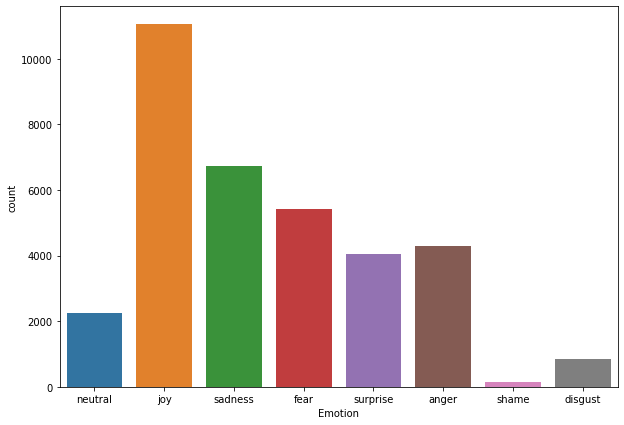

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(df.Emotion)
plt.show()

In [33]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [34]:
def size_(x):
    return len(x)
df['sizes'] = df.Text.apply(size_)

In [35]:
df.Text[3]

" Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself . "

In [36]:
nfx.remove_stopwords(df.Text[3])

"eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."

In [37]:
df.Text[4]

"@Iluvmiasantos ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang "

In [38]:
nfx.remove_userhandles(df.Text[4])

"  ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang "

In [39]:
nfx.clean_text(df.Text[3])

"eye ! true hazel eye-and brilliant ! regular features , open countenance , complexion , oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."

In [40]:
mmf.text_cleantext??

Signature:
mmf.text_cleantext(
    text,
    stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no

In [41]:
df['clean'] = df.Text.apply(mmf.text_cleantext)
df.head()

,Emotion,Text,sizes,clean
0,neutral,Why ?,7,
1,joy,Sage Act upgrade on my to do list for tommorow.,47,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,100,way homegirl baby funeral man hate funeral rea...
3,joy,Such an eye ! The true hazel eye-and so brill...,478,eye true hazel brilliant regular feature open ...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,121,iluvmiasantos ugh babe hugggzzz u babe naamaze...


In [42]:
encode_steps['clean_text'] = mmf.text_cleantext('')

In [43]:
df['clean1'] = df.Text.apply(nfx.remove_userhandles)
df.head()

,Emotion,Text,sizes,clean,clean1
0,neutral,Why ?,7,,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,47,sage act upgrade list tommorow,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,100,way homegirl baby funeral man hate funeral rea...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,478,eye true hazel brilliant regular feature open ...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,121,iluvmiasantos ugh babe hugggzzz u babe naamaze...,ugh babe.. hugggzzz for u .! babe naamazed ...


In [44]:
df['clean1'] = df.clean1.apply(nfx.remove_stopwords)
df.head()

,Emotion,Text,sizes,clean,clean1
0,neutral,Why ?,7,,?
1,joy,Sage Act upgrade on my to do list for tommorow.,47,sage act upgrade list tommorow,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,100,way homegirl baby funeral man hate funeral rea...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,478,eye true hazel brilliant regular feature open ...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,121,iluvmiasantos ugh babe hugggzzz u babe naamaze...,ugh babe.. hugggzzz u .! babe naamazed nga ako...


In [45]:
x1 = df.clean
x2 = df.clean1

In [46]:
y = df.Emotion

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=.3,random_state=42)
td_my_fxn = [xtrain,xtest,ytrain,ytest]
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=.3,random_state=42)
td_nfx = [xtrain,xtest,ytrain,ytest]

In [20]:
pipe_lr = Pipeline([
    ('cv',CountVectorizer()),
    ('lr',LogisticRegression()),
], verbose=True)
pipe_lr1 = Pipeline([
    ('tfid',TfidfVectorizer()),
    ('lr',LogisticRegression()),
], verbose=True)

In [21]:
def fit_(model,td):
    xtrain,xtest,ytrain,ytest = td
    model.fit(xtrain,ytrain)
    display(model.score(xtest,ytest))
    return model

In [22]:
pipe_lr = fit_(pipe_lr,td_my_fxn)
fit_(pipe_lr,td_nfx)
fit_(pipe_lr1,td_my_fxn)
fit_(pipe_lr1,td_nfx)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   4.6s


0.6286644951140065

[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   4.9s


0.6200421536692853

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   4.8s


0.6081624832343361

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   4.8s


0.6022226480168614

Pipeline(steps=[('tfid', TfidfVectorizer()), ('lr', LogisticRegression())],
         verbose=True)

In [23]:
pipe_rf = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier())
], verbose=True)
pipe_rf1 = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
], verbose=True)

In [24]:
fit_(pipe_rf,td_my_fxn)
fit_(pipe_rf,td_nfx)
fit_(pipe_rf1,td_my_fxn)
fit_(pipe_rf1,td_nfx)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  59.1s


0.5836367120137957

[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.3s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  54.9s


0.5863192182410424

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   0.2s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  45.3s


0.618700900555662

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   0.2s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  47.2s


0.6130484767196781

Pipeline(steps=[('tfid', TfidfVectorizer()), ('rf', RandomForestClassifier())],
         verbose=True)

In [24]:
pipe_svc = Pipeline([
    ('cv', CountVectorizer()),
    ('svm', SVC())
], verbose=True)
pipe_svc1 = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('svm', SVC())
])

In [ ]:
fit_(pipe_svc,td_my_fxn)
fit_(pipe_svc,td_nfx)
fit_(pipe_svc1,td_my_fxn)
fit_(pipe_svc1,td_nfx)

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence 

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding, Flatten
from keras.utils import np_utils

In [26]:
index = df.Emotion.value_counts().index

In [27]:
def model_():
    model = Sequential([
        Flatten(),
        Dense(300,activation='relu'),
        Dense(100,activation='relu'),
        Dense(len(index),activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
    return model

In [47]:
x1 = df.clean
# x2 = df.clean1

y = df.Emotion

tf, x1 = mmf.text_tfid(x1,show_table=False,obj=True)
# encode_steps['tfid_vector']=tf
# tf, x2 = mmf.text_tfid(x2,show_table=False,obj=True)

In [48]:
%%time
ss = StandardScaler()
x1 = ss.fit_transform(x1.toarray())
# encode_steps['scalar'] = ss
# ss1 = StandardScaler()
# x2 = ss1.fit_transform(x2.toarray())

Wall time: 52 s


In [55]:
encode_ = {
        index[0]:0,
        index[1]:1,
        index[2]:2,
        index[3]:3,
        index[4]:4,
        index[5]:5,        
        index[6]:6,
        index[7]:7,
    }
def encode(x):
    return encode_[x]

In [57]:
y = y.apply(encode)
y = np_utils.to_categorical(y)
y[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [58]:
x1

array([[-0.00737584, -0.01183674, -0.00536126, ..., -0.00536126,
        -0.00536126, -0.00536126],
       [-0.00737584, -0.01183674, -0.00536126, ..., -0.00536126,
        -0.00536126, -0.00536126],
       [-0.00737584, -0.01183674, -0.00536126, ..., -0.00536126,
        -0.00536126, -0.00536126],
       ...,
       [-0.00737584, -0.01183674, -0.00536126, ..., -0.00536126,
        -0.00536126, -0.00536126],
       [-0.00737584, -0.01183674, -0.00536126, ..., -0.00536126,
        -0.00536126, -0.00536126],
       [-0.00737584, -0.01183674, -0.00536126, ..., -0.00536126,
        -0.00536126, -0.00536126]])

In [13]:
# x2 = x2.toarray()

In [59]:
%%time
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=.3,random_state=42)
td_my_fxn = [xtrain,xtest,ytrain,ytest]
# xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=.3,random_state=42)
# td_nfx = [xtrain,xtest,ytrain,ytest]

Wall time: 11.9 s


In [68]:
def model_accuracy(model,td,batch=100,epochs=5,callback_accuracy_max_difference=.0005,pateince=5):
    xtrain,xtest,ytrain,ytest = td
    es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=callback_accuracy_max_difference, patience = patience, verbose=1)
    model.fit(xtrain,ytrain,batch_size=batch,epochs=epochs,validation_data=[xtest,ytest],callbacks=[es])
    ypred = model.predict(xtest)
    length = len(ypred)
    ylabel = np.argmax(ytest,axis=1)
    yplabel = np.argmax(ytest,axis=1)
    acc = np.sum(ylabel==yplabel)/length*100
    mmf.classificationReport(ylabel,yplabel)
    return model

In [66]:
%time
model = model_accuracy(model_(),td_my_fxn,epochs=300)
# model_accuracy(model_(),td_nfx)

Wall time: 0 ns
Epoch 1/300
244/244 [==============================] - 21s 82ms/step - loss: 1.6082 - accuracy: 0.4862 - val_loss: 1.2887 - val_accuracy: 0.5644
Epoch 2/300
244/244 [==============================] - 13s 53ms/step - loss: 0.3854 - accuracy: 0.8724 - val_loss: 1.4094 - val_accuracy: 0.5669
Epoch 3/300
244/244 [==============================] - 13s 53ms/step - loss: 0.1891 - accuracy: 0.9356 - val_loss: 1.5282 - val_accuracy: 0.5623
Epoch 4/300
244/244 [==============================] - 13s 53ms/step - loss: 0.1193 - accuracy: 0.9606 - val_loss: 1.6387 - val_accuracy: 0.5669
Epoch 5/300
244/244 [==============================] - 13s 54ms/step - loss: 0.0853 - accuracy: 0.9729 - val_loss: 1.7625 - val_accuracy: 0.5696
Epoch 6/300
244/244 [==============================] - 13s 52ms/step - loss: 0.0610 - accuracy: 0.9807 - val_loss: 1.8652 - val_accuracy: 0.5593
Epoch 7/300
244/244 [==============================] - 12s 50ms/step - loss: 0.0481 - accuracy: 0.9858 - val_loss:

In [17]:
encode_steps

{'clean_text': '',
 'encode': {'joy': 0,
  'sadness': 1,
  'fear': 2,
  'anger': 3,
  'surprise': 4,
  'neutral': 5,
  'disgust': 6,
  'shame': 7}}

In [24]:
np.percentile(df.sizes,.5)

7.0

In [84]:
max_len = 255

In [27]:
df.sizes.max()

1160

In [28]:
txt = df[df.sizes==1160].Text.values[0]
print(txt)

 Jacob , you have the luxury of having a haircut that rarely needs styling . I don ’ t . I have to set aside about an hour and a half to get ready in the mornings . Every day , I wake up and head straight for the shower . Every second day , I wash my hair . If it ’ s a hair-washing day , I frequently need to wash my hair twice because it gets really oily . Then I usually put in a conditioner and have to rinse that out too . Because my hair is so long , I seldom manage to take a shower in under twenty minutes . Afterwards , I often put on a pot of coffee and get dressed while I wait for it to brew . I take a long time to get dressed in the morning . Every now and then I remember to choose my outfit the night before , but usually I do it in the morning . In all , getting dressed takes about half an hour , at which time my hair is now semi-dry so then I have to style my hair . From time to time I ’ ll put my hair up , but oftentimes I bloody it straight . And then , because of the texture

In [44]:
x = df.clean
token = Tokenizer(char_level=False,split=' ')
token.fit_on_texts(x)
x = token.texts_to_sequences(x)
x = sequence.pad_sequences(x, maxlen=max_len)

In [45]:
x

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 4678,  648, 3568],
       [   0,    0,    0, ...,   30,  169,  950],
       ...,
       [   0,    0,    0, ...,   80, 2259,    8],
       [   0,    0,    0, ..., 3780,  179,  579],
       [   0,    0,    0, ...,  229,  428,    2]])

In [31]:
encode_

{'joy': 0,
 'sadness': 1,
 'fear': 2,
 'anger': 3,
 'surprise': 4,
 'neutral': 5,
 'disgust': 6,
 'shame': 7}

In [46]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
vocab_len = len(token.index_word)
vocab_len

31082

In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=42,stratify=y)
td = [xtrain,xtest,ytrain,ytest]
def model_accuracy(model,xtest=xtest,ytest=ytest):
    ypred = model.predict(xtest)
    length = len(ytest)
    ylabel = np.argmax(ytest,axis=1)
    yplabel = np.argmax(ypred,axis=1)
    return mmf.classificationReport(ylabel,yplabel)

In [129]:
sentimentLSTM = Sequential()
sentimentLSTM.add(Embedding(vocab_len+1, 100, input_length=max_len, mask_zero=True))
sentimentLSTM.add(LSTM(max_len, activation="tanh"))

sentimentLSTM.add(Dense(max_len, activation="relu"))
sentimentLSTM.add(Dense((max_len/2), activation="relu"))
sentimentLSTM.add(Dropout(0.2))
sentimentLSTM.add(Dense(len(df.Emotion.value_counts().index), activation="softmax"))

sentimentLSTM.compile(optimizer="adam", loss="categorical_crossentropy",metrics='accuracy')

In [130]:
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=.0005, patience = 5, verbose=1)
sentimentLSTM.fit(xtrain,ytrain,batch_size=100,epochs=2,validation_data= [xtest,ytest])# ,callbacks=[es])
model_accuracy(sentimentLSTM)

Epoch 1/2
244/244 [==============================] - 441s 2s/step - loss: 1.4777 - accuracy: 0.4494 - val_loss: 1.1776 - val_accuracy: 0.5859
Epoch 2/2
244/244 [==============================] - 444s 2s/step - loss: 0.9031 - accuracy: 0.6933 - val_loss: 1.1188 - val_accuracy: 0.6191

Test Accuracy :         61.9084115730983%  

Confusion Matrix : 
[[2550  146  156  202  178   76    4    1]
 [ 482  957  124  275  136   38    5    0]
 [ 203   72 1116  151   58   16    7    0]
 [ 170  136   82  808   45   43    5    0]
 [ 405   88   69   97  539    7   14    0]
 [ 104   27   21   38   12  472    2    0]
 [  58   29   20   85   45    9    9    2]
 [   2    0    1   16    7    4    3   11]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      3313
           1       0.66      0.47      0.55      2017
           2       0.70      0.69      0.69      1623
           3       0.48      0.63      0.55      1289
        

In [66]:
def cleanText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT[\s]+','',txt)
    txt = re.sub(r'https?:\/\/\S+','', txt)
    return txt

In [67]:
def pred(text):
    text = mmf.text_cleantext(text)
    text = tf.transform([text])
    text = ss.transform(text.toarray())
    pred = model.predict([text])
    key = list(encode_.keys())
    val = list(encode_.values())
    return key[val.index(np.argmax(pred))]

In [61]:
text = [
    'This is so fun i just dont want it to end',
    'can you please shut up',
    "@Iluvmiasantos ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang ",
    'I have a feeling i will fail french #fuckfrench', #joy
    'If you are robbed of during tribulation it is because u hav not entered into the means He has provided for Joy #prayer Communion w God', #joy
    "@wt2themax1 I'm sorry my blanket isn't comfortable enough for you, that kid isn't #hehasfeelingstoo so what if he eats his scabs...", #disgust
    'I gag in myself wenever i hear my parents say &quot;sexci&quot; =/ ', #disgust
    "I don't girls nowadays who talk to their friends like their talking to their husbands ", #disgust
    'Haha of course I come home to a different house, leave it to my parents to redo the entire downstairs without warning ', #surprise
    "Getting ready for a baby shower at work. Here's hoping no one at work is following me on twitter hahaha Surprise!!", #surprise
    "The awkward moment when you're on a date and you look down and realize your pants aren't zipped. ",
    
       ]

In [21]:
for i in text:
    print(pred(i))

Consider rewriting this model with the Functional API.
sadness
anger
sadness
joy
joy
disgust
sadness
disgust
surprise
surprise
surprise


In [50]:
import joblib

In [51]:
from tensorflow.keras.models import load_model

In [53]:
joblib.dump(encode_,'./app/transformers')
model.save('./app/model/my_neural_network')

In [138]:
joblib.dump(token,'./app/appToken')
joblib.dump(tf,'./app/tfid')
sentimentLSTM.save('./app/model/appSentimentLSTM')

INFO:tensorflow:Assets written to: ./app/model/appSentimentLSTM\assets


INFO:tensorflow:Assets written to: ./app/model/appSentimentLSTM\assets


In [90]:
model = load_model('./app/model/appSentimentLSTM/')
model1 = load_model('./app/model/my_neural_network/')
tf = joblib.load('./app/tfid')
token = joblib.load('./app/appToken')

In [59]:
encode_ = {
        index[0]:0,
        index[1]:1,
        index[2]:2,
        index[3]:3,
        index[4]:4,
        index[5]:5,        
        index[6]:6,
        index[7]:7,
    }

In [87]:
def predictSentiment(txt=text[1]):
    txt = cleanText(txt)

    txt = mmf.text_cleantext(txt)

    txt = token.texts_to_sequences([txt])
    txt = sequence.pad_sequences(txt, maxlen=max_len)

    label = model.predict(txt)
    label = np.argmax(label)
    # label = 
    key = list(encode_.keys())
    val = list(encode_.values())
    # return key[val.index(np.argmax(label))]
    return key[label]

In [108]:
def pred(text):
    text = mmf.text_cleantext(text)
    text = tf.transform([text])
    text = ss.transform(text.toarray())
    pred = model1.predict([text])
    key = list(encode_.keys())
    val = list(encode_.values())
    return key[val.index(np.argmax(pred))]

In [106]:
text = [
    'This is so fun i just dont want it to end',#joy
    'can you please shut up',#anger
    "@Iluvmiasantos ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang ",#joy
    'I have a feeling i will fail french #fuckfrench', #joy
    'If you are robbed of during tribulation it is because u hav not entered into the means He has provided for Joy #prayer Communion w God', #joy
    "@wt2themax1 I'm sorry my blanket isn't comfortable enough for you, that kid isn't #hehasfeelingstoo so what if he eats his scabs...", #disgust
    'I gag in myself wenever i hear my parents say &quot;sexci&quot; =/ ', #disgust
    "I don't girls nowadays who talk to their friends like their talking to their husbands ", #disgust
    'Haha of course I come home to a different house, leave it to my parents to redo the entire downstairs without warning ', #surprise
    "Getting ready for a baby shower at work. Here's hoping no one at work is following me on twitter hahaha Surprise!!", #surprise
    "The awkward moment when you're on a date and you look down and realize your pants aren't zipped. ",#surprise
    
       ]

In [109]:
pred_ = []
txtLabel = ['joy','anger','joy','joy','joy','disgust','disgust','disgust','surprise','surprise','surprise']
z = 0
for i in text:
    pred1 = pred(i)
    pred1_ = 'No'
    pred2 = predictSentiment(i)
    pred2_ = 'No'
    
    if txtLabel[z] == pred1:
        pred1_ = 'Yes'
    if txtLabel[z] == pred2:
        pred2_ = 'Yes'
    pred_.append([pred1,pred2,pred1_,pred2_])
    z+=1
pd.DataFrame(pred_,columns=['ANN Sentiment','LSTM Sentiment','ANN Match','LSTM Match'],index=txtLabel)

,ANN Sentiment,LSTM Sentiment,ANN Match,LSTM Match
joy,sadness,sadness,No,No
anger,anger,anger,Yes,Yes
joy,surprise,joy,No,Yes
joy,joy,joy,Yes,Yes
joy,sadness,joy,No,Yes
disgust,disgust,disgust,Yes,Yes
disgust,surprise,anger,No,No
disgust,disgust,anger,Yes,No
surprise,surprise,surprise,Yes,Yes
surprise,surprise,surprise,Yes,Yes


In [14]:
df[df.sizes==df.sizes.max()]

,Emotion,Text,sizes
16906,anger,"Jacob , you have the luxury of having a hairc...",1160


In [21]:
df[(df.Emotion=='joy') & (df.sizes==601)].Text.values[0]

'After attending a song contest proposed by a band called \\Chyne\\" we (6 of us) waited for the members of the band to greet us in front of the stage.  We went out after a few minutes as it was time to close the hall.  We had been waiting at the entrance hall for ten minutes when three of the band members came out.  They were very excited to see us, one of them was so excited that he had tears in his eyes.  We felt very warm and close to each other.  They took us back into the hall and we talked freely.  We were together for about an hour and during this time we felt that they were very sincere."'

In [23]:
df[(df.Emotion=='sadness') & (df.sizes==533)].Text.values[0]

'My living and working conditions at home were unbearable. We used to live in a three room flat together with two more families. The discords caused a change - one of the families moved out. The other family stayed with us but I drifted away from my fiancT. In fact we were two families in the flat. Then I found myself alone in the struggle for this life because my fiancedid not stay next to me my grief and sorrow took on large proportions. I wanted to commit suicide but instead I threw myself against the cause of the irritation.'

In [22]:
df[(df.Emotion=='sadness')].sizes.max()

533

In [111]:
df[(df.Emotion=='surprise') & (df.sizes==281)].Text.values[0]

'To those workers who profess bewilderment as to how they might help , who feel their knowledge in sexual matters is insufficient or are doubtful of their capabilities for sexual counselling and aid , one would suggest that they raise the matter within their training departments . '